In [144]:
import networkx as nx
import numpy as np
import math
import random

nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g',]

initial_node = input('where do you want to start from')

# Create an empty 1xN matrix (1 row and N columns) with all values as positive infinity
matrix_value = np.full((1, len(nodes)), float('inf'))
matrix_travelled = np.full((1, len(nodes)), float('inf'))

# Create a graph and add nodes and edges as before
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add random weighted edges between nodes with a 50% chance
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if random.random() <= 0.5:
            weight = random.randint(1, 10)
            G.add_edge(nodes[i], nodes[j], weight=weight)

# Extract the edge weights from the graph and store them in the matrix
for neighbor in G.neighbors(initial_node):
    edge_weight = G[initial_node][neighbor]['weight']
    column_index = nodes.index(neighbor)
    matrix_value[-1, column_index] = edge_weight

matrix_travelled[-1][nodes.index(initial_node)] = 0
matrix_value[-1][nodes.index(initial_node)] = 0

print("Initial Matrix travelled: ", matrix_travelled)
print("Initial Matrix Value: ", matrix_value)

i = 0
while any(math.isinf(value) for value in matrix_travelled[-1]):
    i += 1
    sorted_indexes = sorted(range(len(matrix_value[-1])), key=lambda i: matrix_value[-1][i])
    print("New sorted index: ", sorted_indexes)
    for element in sorted_indexes:
        if math.isinf(matrix_travelled[-1][element]):
            print("We are going with: ", element, "which is node: ", nodes[element])
            next_node = nodes[element]
            matrix_travelled[-1][element] = matrix_value[-1][element]

            matrix_travelled = np.vstack((matrix_travelled, matrix_travelled[-1]))
            matrix_value = np.vstack((matrix_value, matrix_value[-1]))

            for neighbor in G.neighbors(next_node):
                edge_weight = G[next_node][neighbor]['weight']
                column_index = nodes.index(neighbor)
                total_value = edge_weight + matrix_travelled[-2][element]
                print("Checking for node: ", neighbor)
                print("Total value: ", total_value, )
                print("Previous value: ", matrix_value[-2][column_index])
                if total_value < matrix_value[-2][column_index]:
                    print("We're changing!")
                    matrix_value[-1, column_index] = total_value
                else:
                    print("We're sticking to the og")

            print("Breaking at: ", nodes[element])
            break

    print("iteration: ", i)
    print("Matrix travelled: ", matrix_travelled)
    print("Matrix Value: ", matrix_value)


Initial Matrix travelled:  [[inf inf inf inf inf  0. inf]]
Initial Matrix Value:  [[inf  1. inf inf  9.  0. inf]]
New sorted index:  [5, 1, 4, 0, 2, 3, 6]
We are going with:  1 which is node:  b
Checking for node:  a
Total value:  4.0
Previous value:  inf
We're changing!
Checking for node:  d
Total value:  10.0
Previous value:  inf
We're changing!
Checking for node:  f
Total value:  2.0
Previous value:  0.0
We're sticking to the og
Checking for node:  g
Total value:  10.0
Previous value:  inf
We're changing!
Breaking at:  b
iteration:  1
Matrix travelled:  [[inf  1. inf inf inf  0. inf]
 [inf  1. inf inf inf  0. inf]]
Matrix Value:  [[inf  1. inf inf  9.  0. inf]
 [ 4.  1. inf 10.  9.  0. 10.]]
New sorted index:  [5, 1, 0, 4, 3, 6, 2]
We are going with:  0 which is node:  a
Checking for node:  b
Total value:  7.0
Previous value:  1.0
We're sticking to the og
Checking for node:  d
Total value:  14.0
Previous value:  10.0
We're sticking to the og
Checking for node:  e
Total value:  9.0
P

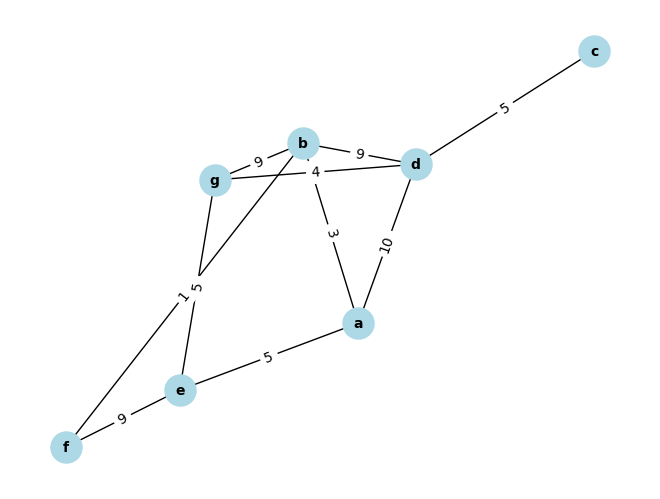

In [145]:
# Draw the graph
pos = nx.spring_layout(G)  # Layout for the graph nodes
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black', node_color='lightblue', font_weight='bold')

# Draw edge labels (weights)
edge_labels = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [141]:
import random
import string

# Get all lowercase letters
letters = string.ascii_lowercase 

# Generate a random end letter
end = random.choice(letters)

# Get the index of end letter
end_idx = letters.index(end)

# Generate list from a to end letter
random_letters = list(letters[:end_idx+1])

print(random_letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']
